# Training the NN

In [1]:

from HiggsML.ingestion import Ingestion
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys

sys.path.append(os.path.join('sample_code_submission', 'model.py'))
sys.path.append(os.path.join('sample_code_submission', 'neural_network.py'))
from model import Model

### Settings

In [2]:
TEST_SETTINGS = {
"systematics": {  # Systematics to use
    "tes": False, # tau energy scale
    "jes": False, # jet energy scale
    "soft_met": False, # soft term in MET
    "w_scale": False, # W boson scale factor
    "bkg_scale": False, # Background scale factor
    },
"num_pseudo_experiments" : 10 , # Number of pseudo-experiments to run per set
"num_of_sets" : 2, # Number of sets of pseudo-experiments to run
}

USE_RANDOM_MUS = True

root_dir = "../"
print("Root directory is", os.path.abspath(root_dir))

input_dir = os.path.join(root_dir, "public_data", "input_data")
output_dir = os.path.join(root_dir, "sample_result_submission")
submission_dir = os.path.join(root_dir, "sample_code_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
test_settings = TEST_SETTINGS.copy()

if USE_RANDOM_MUS:
    test_settings[ "ground_truth_mus"] = (np.random.uniform(0.1, 3, test_settings["num_of_sets"])).tolist()
    
    random_settings_file = os.path.join(output_dir, "random_mu.json")
    with open(random_settings_file, "w") as f:
        json.dump(test_settings, f)
else:
    test_settings_file = os.path.join(input_dir, "test", "settings", "data.json")
    with open(test_settings_file) as f:
        test_settings = json.load(f)

Root directory is /Users/neosapien/Development/Collaboration_D


### Choosing to whether to use the full dataset

In [3]:
USE_PUBLIC_DATASET = False

if USE_PUBLIC_DATASET:
    from HiggsML.datasets import BlackSwan_public_dataset as public_dataset
    data = public_dataset()
else:
    from HiggsML.datasets import Data
    data = Data(input_dir, data_format="parquet")

### Training

[*] Loading Train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5090511 entries, 0 to 5090510
Columns: 16 entries, PRI_lep_pt to PRI_met_phi
dtypes: float32(16)
memory usage: 310.7 MB
None
[*] Train data loaded successfully
[*] Initializing Submmited Model
[*] Loading Train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5090511 entries, 0 to 5090510
Columns: 16 entries, PRI_lep_pt to PRI_met_phi
dtypes: float32(16)
memory usage: 310.7 MB
None
[*] Train data loaded successfully
Full data:  (5090511, 16)
Full Labels:  (5090511,)
Full Weights:  (5090511,)
sum_signal_weights:  3639.000000000001
sum_bkg_weights:  3743369.999999998
 
 
Training Data:  (3770937, 16)
Training Labels:  (3770937,)
Training Weights:  (3770937,)
sum_signal_weights:  3639.0000000000005
sum_bkg_weights:  3743369.9999999935

Valid Data:  (1527153, 16)
Valid Labels:  (1527153,)
Valid Weights:  (1527153,)
sum_signal_weights:  3639.0000000000036
sum_bkg_weights:  3743369.9999999977
 
 
feature engineeri

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: neosapien17 (anonx). Use `wandb login --relogin` to force relogin


Epoch:  2
Training Accuracy:  0.8622379530604728
Saving model to ../ckpts/model-3.pth with accuracy: 0.8622379530604728 at epoch 3
score shape before threshold (3770937,)
score shape after threshold (3770937,)
saved_info {'beta': 2639725.3492186666, 'gamma': 1107283.650781328}
feature engineering took 0.29 s, results:

         PRI_lep_pt   PRI_lep_eta   PRI_lep_phi    PRI_had_pt   PRI_had_eta  \
count  1.527153e+06  1.527153e+06  1.527153e+06  1.527153e+06  1.527153e+06   
mean   4.003434e+01  1.353763e-03  3.150885e-04  5.060644e+01  7.679301e-05   
std    2.394590e+01  1.173391e+00  1.814343e+00  2.749430e+01  1.204639e+00   
min    2.000000e+01 -2.500000e+00 -3.142000e+00  2.285000e+01 -2.680000e+00   
25%    2.584400e+01 -8.900000e-01 -1.571000e+00  3.388900e+01 -9.270000e-01   
50%    3.332000e+01  1.000000e-03  1.000000e-03  4.434600e+01  0.000000e+00   
75%    4.542100e+01  8.930000e-01  1.572000e+00  5.831300e+01  9.260000e-01   
max    1.261630e+03  2.500000e+00  3.142000e+00

,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_n_jets,...,DER_mass_jet_jet,DER_deltaeta_jet_jet,DER_sum_pt,DER_met_phi_centrality,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_lep_eta_centrality,DER_pt_ratio_lep_tau,DER_pt_tot,score
1692743,21.711000,-0.402,1.315,76.572998,0.145,-1.114,76.572998,0.145,-1.114,2.0,...,23.507496,2.643,174.498001,-0.834730,0.404260,2.489829,0.135446,0.283533,111.961792,1.903664
4304572,32.942001,-0.500,2.527,45.888000,-0.539,-1.048,45.888000,-0.539,-1.048,1.0,...,-7.000000,-7.000,124.718002,-0.303253,-7.000000,3.575212,-7.000000,0.717878,83.294281,0.231306
4926484,42.073002,0.764,0.676,70.597000,0.847,-2.632,70.597000,0.847,-2.632,1.0,...,-7.000000,-7.000,183.266998,-1.194415,-7.000000,3.309041,-7.000000,0.595960,148.397858,2.235144
2234489,20.980000,-0.189,1.882,39.196999,-0.483,-1.684,39.196999,-0.483,-1.684,2.0,...,7.988338,0.028,98.801994,1.280742,0.246813,3.578099,0.000000,0.535245,65.602303,0.539032
1570006,35.617001,-1.993,0.573,38.154999,-1.041,-2.171,38.154999,-1.041,-2.171,1.0,...,-7.000000,-7.000,111.927002,-1.400937,-7.000000,2.904452,-7.000000,0.933482,158.428375,0.385329


[*] --- Description of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_n_jets,...,DER_mass_jet_jet,DER_deltaeta_jet_jet,DER_sum_pt,DER_met_phi_centrality,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_lep_eta_centrality,DER_pt_ratio_lep_tau,DER_pt_tot,score
count,1.527153e+06,1.527153e+06,1.527153e+06,1.527153e+06,1.527153e+06,1.527153e+06,1.527153e+06,1.527153e+06,1.527153e+06,1.527153e+06,...,1.527153e+06,1.527153e+06,1.527153e+06,1.527153e+06,1.527153e+06,1.527153e+06,1.527153e+06,1.527153e+06,1.527153e+06,1.527153e+06
mean,4.003434e+01,1.353763e-03,3.150885e-04,5.060644e+01,7.679301e-05,-2.838237e-04,7.439852e+01,-1.424719e-04,-6.275986e-04,1.657121e+00,...,2.206080e+01,-1.073654e+00,1.650376e+02,4.090135e-01,-2.400521e+00,2.943746e+00,-2.146450e+00,9.296855e-01,2.887430e+02,1.296617e+00
std,2.394590e+01,1.173391e+00,1.814343e+00,2.749430e+01,1.204639e+00,1.813262e+00,5.838199e+01,1.546150e+00,1.811578e+00,4.746717e-01,...,3.965610e+01,4.435867e+00,8.830291e+01,1.139744e+00,4.145837e+00,9.482580e-01,3.519443e+00,6.629989e-01,3.590334e+02,9.867285e-01
min,2.000000e+01,-2.500000e+00,-3.142000e+00,2.285000e+01,-2.680000e+00,-3.142000e+00,2.292800e+01,-4.924000e+00,-3.142000e+00,1.000000e+00,...,-7.000000e+00,-7.000000e+00,6.201600e+01,-7.000000e+00,-1.503271e+01,5.281363e-01,-7.000000e+00,2.764731e-02,3.991873e+01,-3.692898e+00
25%,2.584400e+01,-8.900000e-01,-1.571000e+00,3.388900e+01,-9.270000e-01,-1.570000e+00,4.105700e+01,-1.113000e+00,-1.570000e+00,1.000000e+00,...,-7.000000e+00,-7.000000e+00,1.128120e+02,-9.953464e-01,-7.000000e+00,2.387369e+00,-7.000000e+00,5.397514e-01,1.064473e+02,4.795597e-01
50%,3.332000e+01,1.000000e-03,1.000000e-03,4.434600e+01,0.000000e+00,-2.000000e-03,5.539600e+01,-3.000000e-03,-4.000000e-03,2.000000e+00,...,1.320513e+01,8.050000e-01,1.410550e+02,1.057806e+00,-1.591212e+00,3.084064e+00,5.673961e-04,7.682292e-01,1.701774e+02,1.391673e+00
75%,4.542100e+01,8.930000e-01,1.572000e+00,5.831300e+01,9.260000e-01,1.570000e+00,8.351400e+01,1.113000e+00,1.568000e+00,2.000000e+00,...,3.165169e+01,2.285000e+00,1.830970e+02,1.371466e+00,4.933600e-01,3.472171e+00,5.221328e-01,1.105587e+00,3.078724e+02,2.066675e+00
max,1.261630e+03,2.500000e+00,3.142000e+00,8.750220e+02,2.688000e+00,3.142000e+00,1.403050e+03,4.912000e+00,3.142000e+00,2.000000e+00,...,8.095511e+02,7.959000e+00,2.603398e+03,1.414214e+00,1.503115e+01,7.483812e+00,1.000000e+00,5.258325e+01,6.073590e+03,5.949532e+00


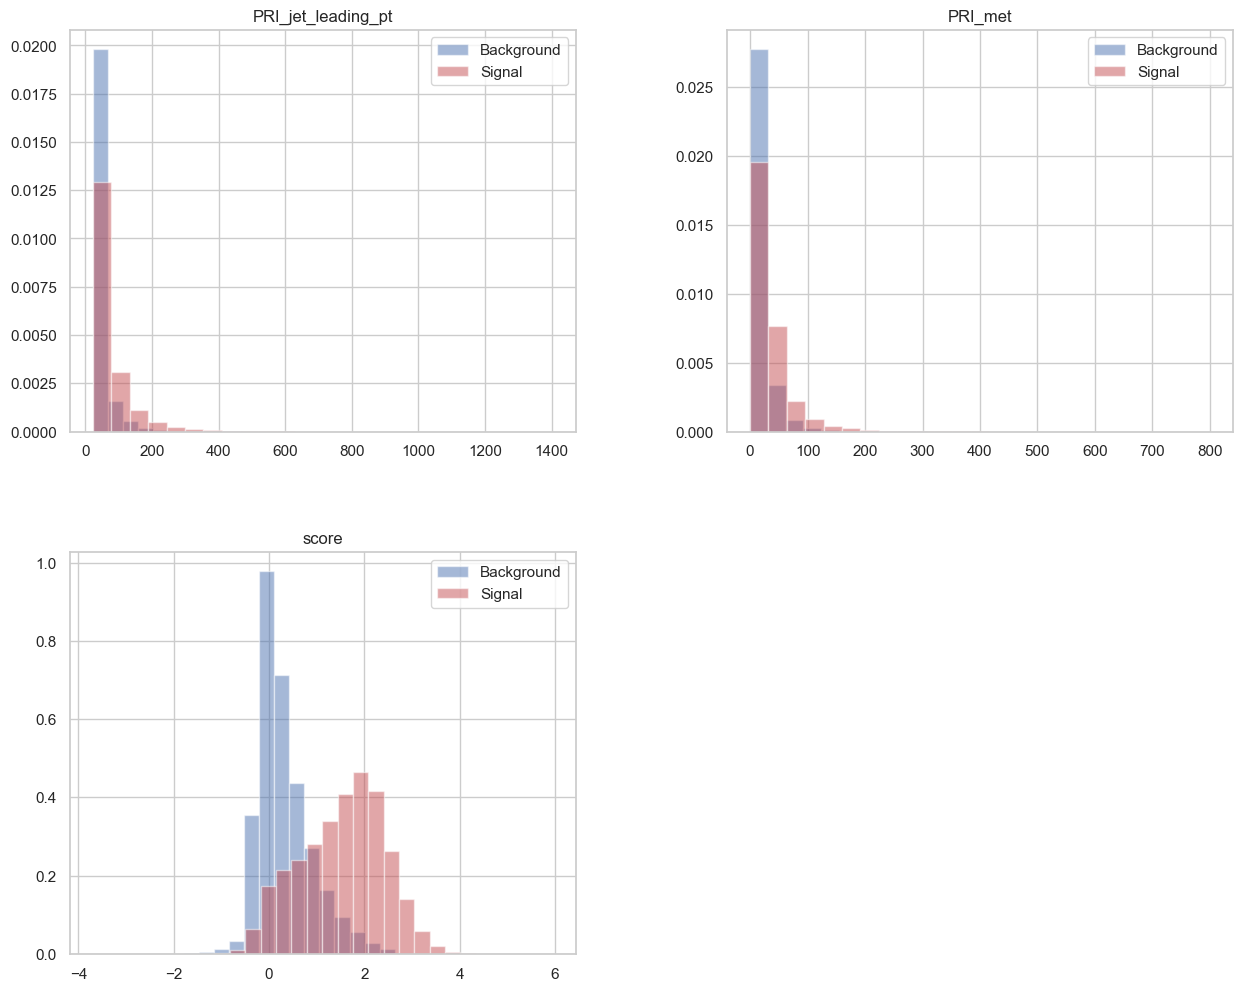

diboson (44079,)
diboson (44079,)
htautau (30,)
ttbar (56469,)
ttbar (56469,)
ztautau (156155,)
ztautau (156155,)


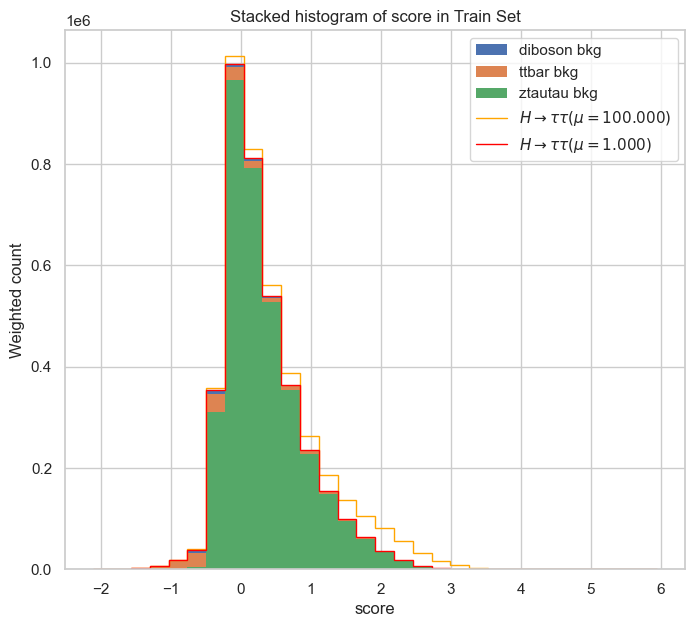

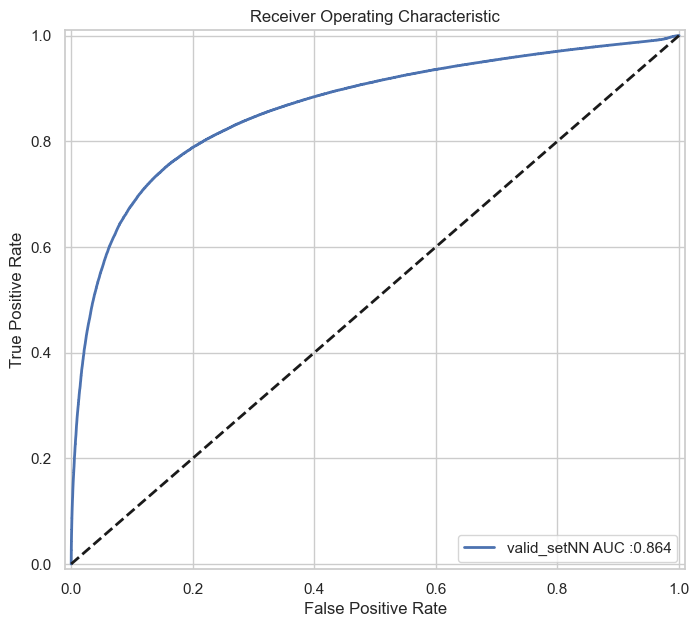

In [4]:
data.load_train_set()
ingestion = Ingestion(data)
ingestion.init_submission(Model)
# if you truly want to train, change the epochs to a reasonable number in neural_network.py
ingestion.fit_submission()